## 요인분석

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
import pingouin as pg ## 신뢰도 측정
%matplotlib inline
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## 1. 정의

- 심리학, 행동과학 등의 여러 영역에서 주된 관심의 개념을 직접 측정 불가하기 때문에 간접적으로 측정
- 예를 들면 지능은 시험점수, 사회계급은 직업 및 교육배경 등 간접적으로 측정한다.

- 잠재변수(Latent Variable) : 직접 측정이 불가하지만 측정할 수 있는 변수
- 요인분석 : 측정수와 잠재변수 사이의 관계를 밝히는 것
    - 탐색적 요인분석(EFA) : 어떤 측정변수가 어떤 요인에 관련된다는 특정한 가정없이 측정변수와 요인 사이의 관계 조사
    - 확인적 요인분석(CFA) : 사전에 가정된 특정한 요인모형에 대해 측정변수 사이의 공분산 또는 상관관계를 적절하게 적합하는지 검정

## 2. 탐색적 요인분석(EFA)

- 자료의 요약 : 변수의 수 보다 적은 소수의 공통된 변인으로 묶는다.
- 측정항목의 타당성 평가 : 묶여지지 않은 변수는 다른 특성을 가진다고 판단
- 변인구조 파악 : 변수들의 상호관계를 파악한다.
- 불필요한 변수 제거 : 요인에 포함되지 않거나 중요도나 설명력이 낮은 변수를 제거한다.
- 요인분석을 이용한 변수 생성 : 회귀분석, 판별분석, 군집분석 등에 적용

- 5개의 문항에 내재된 하나의 공통 요인(common factor): $f$
- 각 문항의 특정요인(specific factor): $u_i$ - 랜덤변동
- 요인분석에서 추정하는 것은 분산 (공통요인의 분산+특정요인의 분산)
- 특정요인의 분산은 순전히 공통요인를 완벽히 측정하지 못하는 데서 오는 오차라고 가정

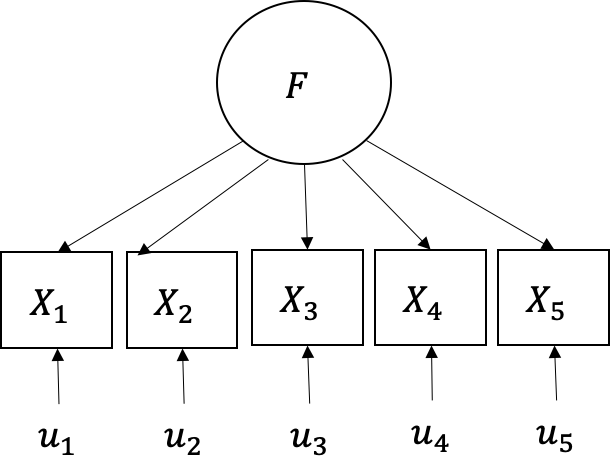

### 1) 가정
- $u_i들은 서로 독립이다.$
- $u_i와 f 서로 독립이다.$
- 등간척도로 구성된다.
    - 등간척도 : 데이터 간 차이가 숫자를 통해 드러난다. 곱셈 나눗셈 연산은 불가(평균, 분산 등은 가능하다. 대표적인 예시가 온도). 절대 0점이 존재 하지 않는다.
- 모상관행렬이 단위 행렬이라는 가설이 기각되어야 한다.(KMO / Bartlet)
    - Bartlett(모든 상관관계 값들이 전반적인 유의성을 나타낸다. P-value < 0.05)
    - KMO(전체 상관관계 행렬이 요인분석에 적합한지, KMO >=0.5)
    
- 최초 요인 추출 단계에서 얻은 고유치를 팔꿈치 그림으로 표현했을 때 한군데 이상 꺾여야 한다.
- 변수간에 높은 상관관계가 있어야 한다.(상관관계가 높은 변수들끼리 그룹화 하는것이기 때문)

- $X_i의 분산을 공통요인 f의 분산과 특정요인 u_i의 분산으로 구분$
    - $var(X_i) = var(l_i f+u_i) = l_i^2 + var(u_i)$(=1 표준화했다면)

### 2) 공통성(Communality)
- Communality of $X_i = l_i^2 = 1-var(u_i)$
- $X_i$의 분산 중 공통요인에 의해 발생하는 분산의 비율
- Communality가 크면(1에 가까울수록) 변수 $X_i$가 공통요인을 잘 측정한다고 할 수 있다.

### 3) 두개의 요인분석 모델

- 예시 : 학생들의 성적이 2개의 잠재력으로 표현 언어능력($f_1$), 수리능력($f_2$)

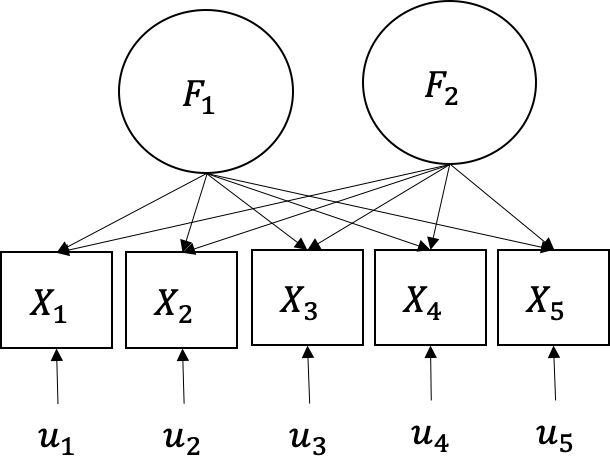

- $f_i$들이 서로 독립이라고 가정
- Communality of $X_i = l_{i1}^2 + l_{i2}^2$
- ex : $X_1 = l_{11} f_1  l_{12} f_2 + u_1$

### 4) 예제

In [2]:
app = pd.read_csv('Applicant.TXT',delimiter=r'\s+')

In [3]:
app = app.iloc[:,1:]

In [4]:
scale_app = pd.DataFrame(StandardScaler().fit_transform(app),columns=app.columns)

In [5]:
chi,p = calculate_bartlett_sphericity(scale_app)
kmo_all,kmo_model = calculate_kmo(scale_app)
print('Bartlett 구형성 검정 카이제곱 : {} ; p-value : {}\n KMO 값 : {}'.format(chi,p,kmo_model))

Bartlett 구형성 검정 카이제곱 : 658.3173542829711 ; p-value : 2.2179076942984003e-81
 KMO 값 : 0.7765544864788576


In [6]:
pg.cronbach_alpha(scale_app)[0]

0.9141171523173567

- Bartlett의 p-value도 0.05보다 작고, KMO값도 0.5보다 커야는데 0.77이고, 신뢰도 계수도 0.914이기에 요인분석에 적합한 자료라고 할 수 있다.

**Bartlett**
- 귀무가설 : 상관관계 행렬이 단위행렬로 일정한 형태의 그래프 모양을 가지지 않는다.
- pvalue가 0에 가까우니 귀무가설을 기각해서 상관관계 행렬이 일정한 형태를 갖는다라고 결론을 내릴 수 있다. 즉, 변수들간의 선형 상관성을 가진다고 할 수 있다.

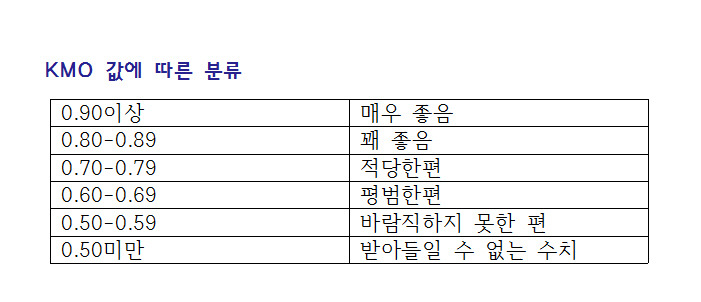

In [7]:
def CronbachAlpha_df(df) :
    
    delmean_list = []
    for i in itertools.combinations(reversed(range(0,len(df.columns))),len(df.columns) - 1) :
        delmean_list.append(round(df.iloc[:,list(i)].sum(axis = 1).mean(),2))
    total_df = pd.DataFrame(delmean_list,index = df.columns,columns=['삭제_척도평균'])
    
    delvar_list = []
    for i in itertools.combinations(reversed(range(0,len(df.columns))),len(df.columns) - 1) :
        delvar_list.append(round(df.iloc[:,list(i)].sum(axis = 1).var(),3))
    total_df.insert(1,'삭제_척도분산',delvar_list)
    
    coef_list = []
    for i,v in enumerate(itertools.combinations(reversed(range(0,len(df.columns))),len(df.columns) - 1)) :
        coef_list.append(round(np.corrcoef(df.iloc[:,i],df.iloc[:,list(v)].mean(axis = 1))[0][1],3))
    total_df.insert(2,'수정된항목_전체상관계수',coef_list)
    
    crondel_list = []
    for i in itertools.combinations(reversed(range(0,len(df.columns))),len(df.columns) - 1) :
        crondel_list.append(round(pg.cronbach_alpha(df.iloc[:,list(i)])[0],3))
        
    total_df['삭제_Cronhach'] = crondel_list
    
    return total_df

In [8]:
CronbachAlpha_df(scale_app)

,삭제_척도평균,삭제_척도분산,수정된항목_전체상관계수,삭제_Cronhach
X1(FL),0.0,95.123,0.416,0.915
X2(APP),-0.0,92.898,0.535,0.911
X3(AA),-0.0,101.316,0.098,0.925
X4(LA),0.0,92.121,0.577,0.910
X5(SC),-0.0,89.976,0.696,0.906
X6(LC),-0.0,88.311,0.790,0.903
X7(HON),0.0,96.250,0.356,0.917
X8(SMS),0.0,87.749,0.822,0.901
X9(EXP),0.0,96.278,0.355,0.917
X10(DRV),0.0,87.945,0.811,0.902


- 만일 신뢰도 계수가 0.6을 넘지 못했으면 위의 표를 참고하여 신뢰도 계수를 넘겨줍니다.
- 예를 들어 X3(AA)를 삭제할 경우 신뢰도 계수의 값은 0.925입니다.

In [9]:
fa1 = FactorAnalyzer(n_factors=4,rotation=None)

In [10]:
fa1.fit(scale_app)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

#### Uniqueness

In [55]:
pd.DataFrame(fa1.get_uniquenesses(),index = scale_app.columns).T

,X1(FL),X2(APP),X3(AA),X4(LA),X5(SC),X6(LC),X7(HON),X8(SMS),X9(EXP),X10(DRV),X11(AMB),X12(GSP),X13(POT),X14(KJ),X15(SUIT)
0,0.450254,0.684892,0.528244,0.176734,0.130044,0.218061,0.30294,0.124681,0.330487,0.254561,0.133817,0.154216,0.089735,0.004019,0.243403


#### Communality

In [60]:
pd.DataFrame(fa1.get_communalities(),index = scale_app.columns).T

,X1(FL),X2(APP),X3(AA),X4(LA),X5(SC),X6(LC),X7(HON),X8(SMS),X9(EXP),X10(DRV),X11(AMB),X12(GSP),X13(POT),X14(KJ),X15(SUIT)
0,0.549746,0.315108,0.471756,0.823266,0.869956,0.781939,0.69706,0.875319,0.669513,0.745439,0.866183,0.845784,0.910265,0.995981,0.756597


<AxesSubplot:>

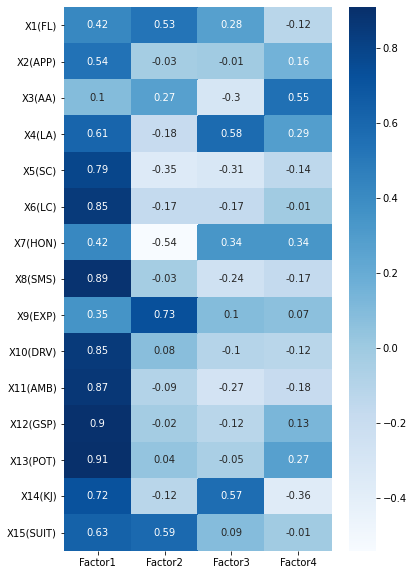

In [57]:
result = pd.DataFrame(fa1.loadings_,index=scale_app.columns)
result.columns = ["Factor{}".format(i) for i in range(1,5)]
result = round(result,2)

plt.figure(figsize = (6,10))
sns.heatmap(result,cmap='Blues',annot = True)

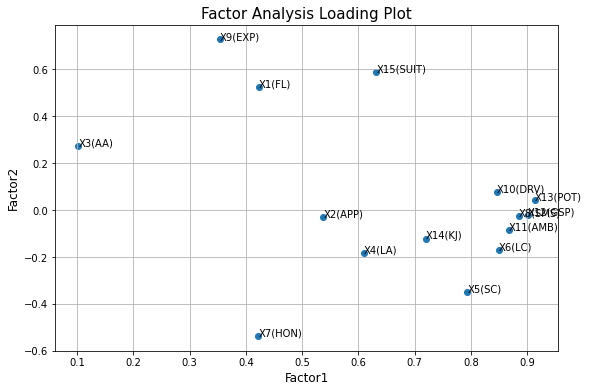

In [61]:
fig,ax = plt.subplots(figsize = (9,6))
plt.title("Factor Analysis Loading Plot", fontsize = 15)
x = fa1.loadings_[:,0]
y = fa1.loadings_[:,1]
ax.scatter(x,y)
for i, txt in enumerate(scale_app.columns) :
    ax.annotate(txt,(x[i],y[i]),)
    
plt.xlabel("Factor1",fontsize = 12)
plt.ylabel("Factor2",fontsize = 12)
plt.grid()
plt.show()

- 마케팅능력=(SC+LC+SMS+DRV+AMB+GSP+POT)/6 라고 정의

In [62]:
fa_df = pd.DataFrame(fa1.get_factor_variance(),columns=["Factor{}".format(i) for i in range(1,5)])
fa_df.index = ['SS Loadings','Proportion Var','Cumulative Var']
fa_df

,Factor1,Factor2,Factor3,Factor4
SS Loadings,7.324860,1.738133,1.251845,0.859075
Proportion Var,0.488324,0.115876,0.083456,0.057272
Cumulative Var,0.488324,0.604200,0.687656,0.744928


- 4개의 요인에 의해 변동량 74%가 설명되고 있다.
- 주성분과 해석이 비슷하지만 요인분석의 경우 factor의 개수 증가 or 감수로 인해 분산 설명 비율이 달라진다.

### 5) 요인개수 추정
- 주성분 분석과 달리 서로 다른 요인 개수에 대해 갖는 해는 매우 다른 요인적재값을 보여줌
- 요인 개수가 너무 적으면 너무 많은 큰 요인적재값이 있을 수 있음
- 요인 개수가 너무 많으면 요인는 단편화 되고 설득력 있는 해석이 어려움
- 서로 다른 k 값에 대응하는 해를 조사하여 가장 확신을 주는 해석을 줄 수 있는지를 주관적으로 정하여 수행
- 객관적으로 요인 개수를 결정하는 방법
    - Scree plot 사용
        - 주성분분석에서 사용한 scree plot 사용
        - 분산 설명 변동의 크기(고유치)가 갑자기 줄어들기 바로 전까지의 개수 결정
        - 고유값이 요인가 아니라 주성분의 분산을 나타내기 때문에 주성분분석만큼 의미가 명확하지 않음
    - 가설검정
        - 최대우도 접근법에서 사용
        - $H_0$: k개 공통요인이 데이터를 설명하기에 충분하다.
        - $\chi^2$ - test를 사용하여 검정
        - k를 1씩 증가시키며 탐색

In [102]:
def screeplot(fa,df) :
    plt.figure(figsize = (8,6))
    plt.scatter(range(1,df.shape[1]+1),fa.get_eigenvalues()[0])
    plt.plot(range(1,df.shape[1]+1),fa.get_eigenvalues()[0])
    plt.title("Scree Plot",fontsize = 15)
    plt.xlabel("Factor")
    plt.xticks(list(range(1,df.shape[1]+1)))
    plt.ylabel("Eigenvalue")
    plt.grid()
    plt.show()

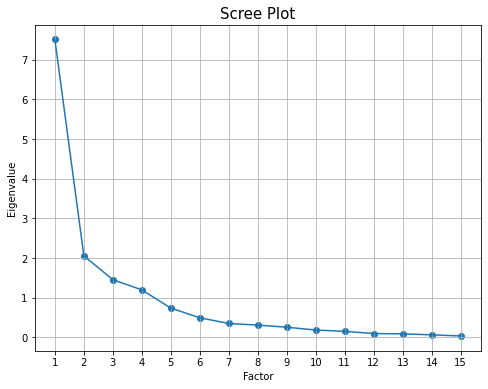

In [103]:
screeplot(fa1,scale_app)

### 6) 요인회전(Factor Rotation)

#### 요인적재값에 의해 원 변수를 그룹화 하지만 그 결과가 언제가 명확하지는 않음
- 하나의 원 변수에 부하값이 큰 요인이 2개 이상 존재하는 경우
- 요인의 크기가 0을 중심으로 ±의 작은 값이 같이 있는 경우

#### 직교회전
- 회전된 요인들이 서로 상관되지 않도록 제약
- varimax : 한 공통요인에 대해 각 변수가 가지는 요인적재값 제곱의 분산이 최대화 되도록 변환
- quartimax : 한 변수가 각 공통요인에서 차지하는 비중의 제곱에 대해 분산을 최대화하도록 변환

#### 사각회전 
- 상관된 요인들을 허용
- oblinmin : 요인들 사이의 상관성 정도를 제어하는데 사용되는 모수를 통해 단순한 구조를 찾음
- promax : varimax 회전에 의한 적재값을 어떤 승수로 올리는 방법

#### 어떤 회전이 적절한가?
- 보편적인 답은 없지만 데이터에 가장 잘 맞는 결과를 얻는데 관심이 있다면 사각회전
- 결과를 일반화 하는데 더 관심이 있다면 직교회전

In [153]:
value = len(app.columns)

### 요인변수 값 추가

In [ ]:
pd.DataFrame(fa1.fit_transform(scale_app))

In [19]:
app['Factor1'] = [round((fa1.loadings_[:,0] * app.iloc[i,range(value)]).mean(),3) for i in range(len(app))]
app['Factor2'] = [round((fa1.loadings_[:,1] * app.iloc[i,range(value)]).mean(),3) for i in range(len(app))]
app['Factor3'] = [round((fa1.loadings_[:,2] * app.iloc[i,range(value)]).mean(),3) for i in range(len(app))]
app['Factor4'] = [round((fa1.loadings_[:,3] * app.iloc[i,range(value)]).mean(),3) for i in range(len(app))]

array([[ 4.75816822e-01, -1.67105079e-04, -5.00863278e-01,
        -1.45059545e+00],
       [ 1.16326782e+00,  3.02210163e-02, -1.03550352e-01,
        -5.43015110e-01],
       [ 7.17576126e-01, -7.51331483e-02,  9.57335635e-03,
        -1.27291320e+00],
       [-2.12860670e-02,  3.78315995e-01,  4.94395149e-01,
         5.13364260e-01],
       [ 2.64648027e-01,  7.95424449e-01,  1.01874416e+00,
         1.03402957e+00],
       [ 2.02410096e-01,  2.23398215e-01, -5.17184504e-02,
         5.80949037e-01],
       [ 1.13661081e+00,  1.07675677e+00,  3.29053890e-01,
        -3.49192701e-01],
       [ 1.31953485e+00,  9.26267329e-01,  5.79089343e-01,
        -7.00920079e-01],
       [ 8.34582487e-01,  9.11290998e-01,  7.52009987e-01,
        -4.38867601e-01],
       [ 9.40974534e-01,  3.33657947e-01, -2.61629599e+00,
        -1.95882519e-02],
       [ 5.25091952e-01,  5.84666236e-01, -3.19927357e+00,
        -6.75957877e-02],
       [ 7.68507686e-01, -1.92714706e-01, -2.08526219e+00,
      

## 3. 확인적 요인 분석(Confirmatory factor analysis)

In [157]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)